In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
def runningMeanFast(x, N):
    return np.convolve(x, np.ones((N,))/N)[(N-1):]


def getCurve(fName,n):
    raw = np.loadtxt(fName,delimiter=',')
    return np.convolve(raw[:,1], np.ones((n,))/n)[(n-1):] 

In [ ]:
# скорость обучения 0.05. 5 случайных шагов в SGD
rate1 = np.loadtxt('fullModel-12June2.csv',delimiter=',')
rate1[:,1] = runningMeanFast(rate1[:,1],100)

rate = getCurve('fullModel-12June3.csv')

In [ ]:
# скорость обучения 0.2. 1 случайный шаг в SGD
rate2 = np.loadtxt('fullModel-12June3.csv',delimiter=',')
rate2[:,1] = runningMeanFast(rate2[:,1],1000)

In [ ]:
rate = getCurve('fullModel-12June-v2.csv',5000)
plt.figure(figsize = [18,7])
plt.subplot(121)
plt.plot(rate)
plt.ylim([0.2, 0.3])
#plt.xlim([5e4, len(rate)])
plt.xlabel('Epoch')

plt.subplot(122)
plt.semilogx(rate)
#plt.xlim([3e5, len(rate)])
plt.ylim([0.2, 0.3])
plt.xlabel('Epoch')

Полноразмерная модель с 128 скрытыми измерениями (файл fullModel-12June.pcl). Начальная скорость 0.2, затухание 1e-8, количество случайных шагов в SGD = 1 (для каждого пользователя выбирается один случайных товар из одной случайной корзины и выполняется только один случайный шаг). Очевидно, что модель выходит на плато после выполнения 1.4 млн. эпох. А может быть и нет? Стоит подождать ещё. 
В любом случае, полученные результаты стоит сохранить.

Что можно попробовать?

Цель - научиться обучать модель максимально быстро. Для этого стоит попробовать обучение с большей начальной скорость. Например, замахнуться на 0.3. После того, как будут найдены оптимальная начальная скорость, следуется найти оптимальное затухание, далее - подобрать регуляризаторы и размерность скрытого пространства.


- Протестировать полученную модель (общая процедура оценки качества полученных моделей);
- попробовать уменьшить нормализационный фактор;
- увеличить размерность скрытого пространства по пользователям
    Количество скрытых измерений - 128, Пользователей: 206209 (/128 = 17184), продуктов 49688 (/12 = 4140). Может быть стоит увеличить количество скрытых измерений для пользователей.

<u>13 июня</u>
Начал обучение новой полноразормерной модели (файл fullModel-13June.pcl), 128 скрытых измерений. Начальная скорость обучения 0.2, затухание 1e-7, случайный выбор пользователей, по одному SGD шагу.

Overflow после шага 36 000. Уменьшил скорость обучения до 0.1


In [ ]:
rate = getCurve('fullModel-13June.csv',1000)
plt.figure(figsize = [18,7])
plt.subplot(121)
plt.plot(rate)
plt.ylim([0.2, 0.55])
#plt.xlim([5e4, len(rate)])
plt.xlabel('Epoch')

plt.subplot(122)
plt.semilogx(rate)
plt.xlim([1e3, len(rate)])
plt.ylim([0.2, 0.55])
plt.xlabel('Epoch')

f1 мера FPMC модели составляет примерно половину от f1 меры базовой модели. Попробую улучшить качество, добавив скрытые измерения к пользователям.

<u>Полноразмерная модель fullModel-13June-2.pcl </u> 512 измерений для пользователей, 128 измерений для продуктов. Начальная скорость 0.1, затухание 1e-7, нормализация 0.1

In [ ]:
rate = getCurve('fullModel-13June-2.csv',1000)
plt.figure(figsize = [18,7])
plt.subplot(121)
plt.plot(rate)
plt.ylim([0.15, 0.55])
#plt.xlim([5e4, len(rate)])
plt.xlabel('Epoch')

plt.subplot(122)
plt.semilogx(rate)
plt.xlim([1e3, len(rate)])
plt.ylim([0.15, 0.55])
plt.xlabel('Epoch')

In [ ]:
FPMC score 87.806806
Mean score 176.273566

In [ ]:
FPMC score 85.114338
Mean score 176.273566

In [ ]:
3e6 epoch
FPMC score 95.234229
Mean score 176.273566

In [ ]:
FPMC score 92.393821
Mean score 176.273566

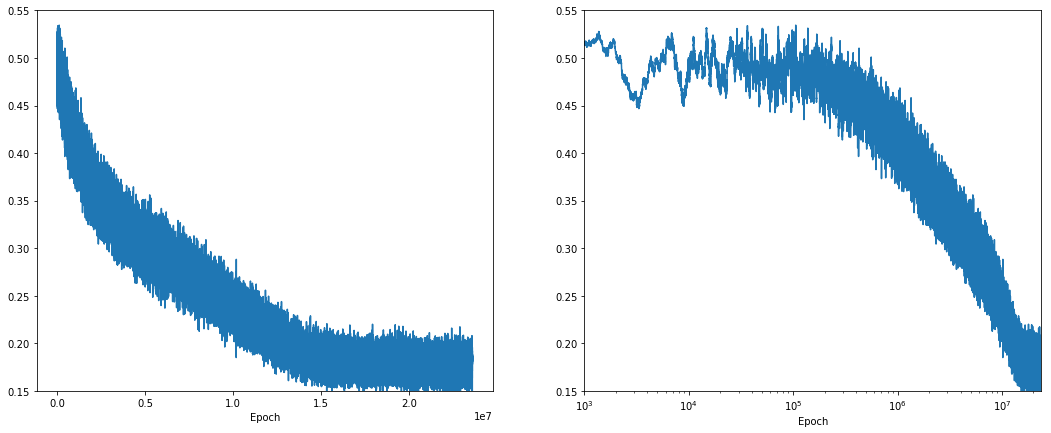

In [3]:
rate = getCurve('fullModel-13June-3.csv',1000)
plt.figure(figsize = [18,7])
plt.subplot(121)
plt.plot(rate)
plt.ylim([0.15, 0.55])
#plt.xlim([5e4, len(rate)])
plt.xlabel('Epoch')

plt.subplot(122)
plt.semilogx(rate)
plt.xlim([1e3, len(rate)])
plt.ylim([0.15, 0.55])
plt.xlabel('Epoch')